EDA


In [1]:
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('filtered_training.csv')

In [3]:
print("Dataset info:")
print(data.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     6005 non-null   int64 
 1   path           6005 non-null   object
 2   label          6005 non-null   int64 
 3   youtube title  6005 non-null   object
 4   youtube url    5736 non-null   object
 5   video_num      6005 non-null   int64 
 6   file_id        6005 non-null   int64 
 7   Youtube title  6005 non-null   object
 8   Start_time     6005 non-null   int64 
 9   End_time       6005 non-null   int64 
 10  Label          6005 non-null   int64 
 11  url            6005 non-null   object
dtypes: int64(7), object(5)
memory usage: 563.1+ KB
None


In [4]:
print("\nFirst few rows:")
print(data.head())


First few rows:
   Unnamed: 0                path  label  \
0           0  training/398/0.wav      3   
1           1  training/398/1.wav      3   
2           2  training/398/2.wav      3   
3           3  training/398/3.wav      3   
4           4  training/398/4.wav      3   

                                       youtube title  \
0  US Army, NATO. Powerful M1A2 Abrams and TR-85 ...   
1  US Army, NATO. Powerful M1A2 Abrams and TR-85 ...   
2  US Army, NATO. Powerful M1A2 Abrams and TR-85 ...   
3  US Army, NATO. Powerful M1A2 Abrams and TR-85 ...   
4  US Army, NATO. Powerful M1A2 Abrams and TR-85 ...   

                                        youtube url  video_num  file_id  \
0  https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s        398        0   
1  https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s        398        1   
2  https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s        398        2   
3  https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s        398        3   
4  htt

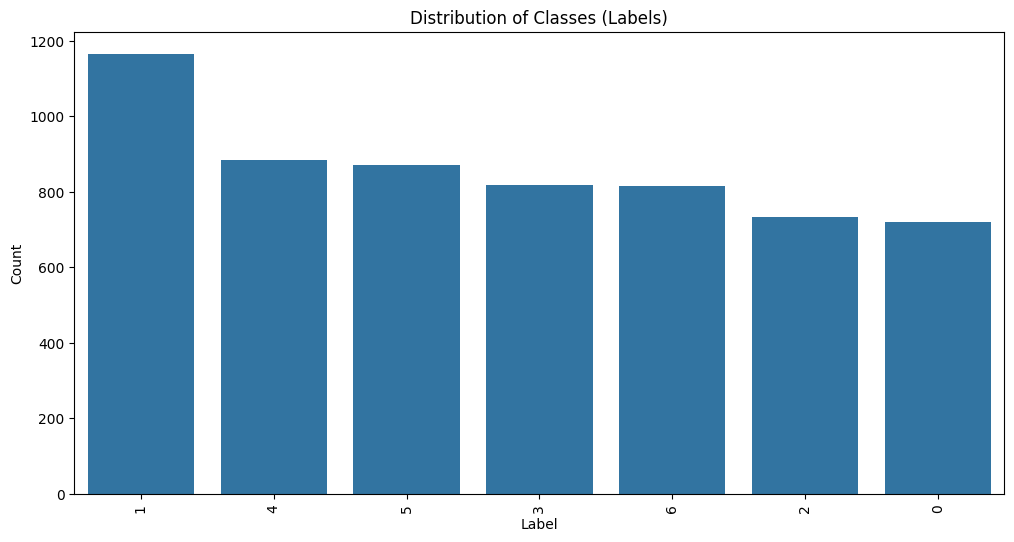

In [6]:
data['label'] = data['label'].astype(str)

# Plot label distribution with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title("Distribution of Classes (Labels)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Duration statistics:
count    6005.000000
mean        5.437469
std         2.888264
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        47.000000
Name: duration, dtype: float64


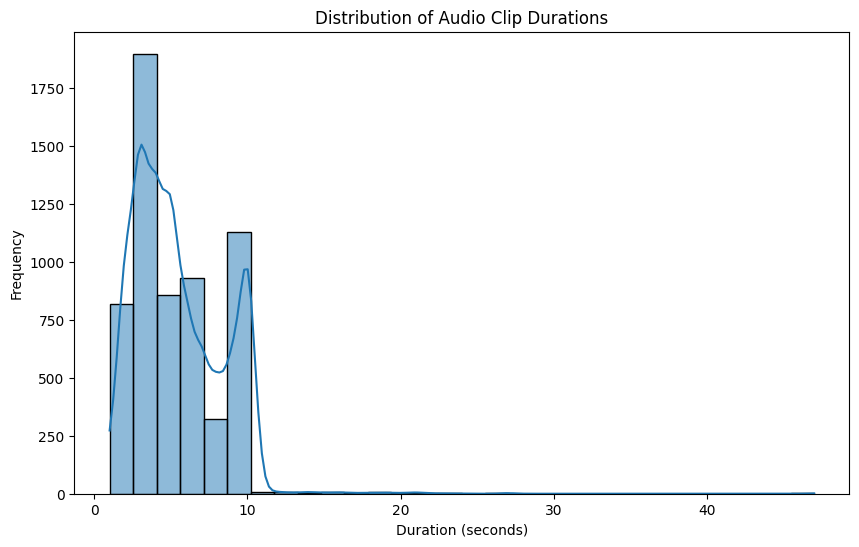

In [8]:
data['duration'] = data['End_time'] - data['Start_time']

# Display basic statistics for the duration
print("Duration statistics:")
print(data['duration'].describe())

# Plot distribution of durations
plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], bins=30, kde=True)
plt.title("Distribution of Audio Clip Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Paths
base_path = 'data/MAD_dataset/training'
csv_file = 'filtered_training.csv'  # Adjust path as needed

# Load CSV file with labels and other info
df_annotations = pd.read_csv(csv_file)

# Initialize a list to store features, file names, labels, etc.
data = []

# Function to extract MFCC features with delta and delta-delta
def extract_mfcc_features(file_path, sample_rate=22050, n_mfcc=40):
    try:
        # Load audio file
        audio_data, sr = librosa.load(file_path, sr=sample_rate)
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=n_mfcc)
        
        # Extract delta (first derivative) and delta-delta (second derivative)
        delta_mfccs = librosa.feature.delta(mfccs)
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)
        
        # Concatenate original MFCCs with delta and delta-delta
        mfcc_combined = np.concatenate((mfccs, delta_mfccs, delta2_mfccs), axis=0)
        
        # Calculate summary statistics
        mfcc_mean = np.mean(mfcc_combined, axis=1)
        mfcc_var = np.var(mfcc_combined, axis=1)
        mfcc_min = np.min(mfcc_combined, axis=1)
        mfcc_max = np.max(mfcc_combined, axis=1)
        
        # Concatenate all statistics to form a single feature vector
        mfcc_stats = np.concatenate((mfcc_mean, mfcc_var, mfcc_min, mfcc_max), axis=0)
        
        return mfcc_stats
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Loop through each file in the annotations DataFrame
for index, row in df_annotations.iterrows():
    folder_name = row['folder_name'].lstrip('0')  # Remove leading zeros
    file_name = row['file_name']
    label = row['label']  # Example column for label
    file_path = os.path.join(base_path, folder_name, file_name)
    
    # Extract features and store with label and other info
    features = extract_mfcc_features(file_path)
    if features is not None:
        data.append([file_name, label, *features])

# Define column names for the DataFrame based on the number of MFCC features
n_mfcc = 40  # Adjust based on `n_mfcc` value used in feature extraction
column_names = ['filename', 'label'] + [f'mfcc_{stat}_{i+1}' for stat in ['mean', 'var', 'min', 'max'] for i in range(n_mfcc * 3)]

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=column_names)

# Save the DataFrame to a CSV file
output_csv = 'training_features_with_labels.csv'
df.to_csv(output_csv, index=False)

print(f"Feature extraction complete. Features with labels saved to {output_csv}.")


KeyError: 'folder_name'

In [ ]:
# import os
# import librosa
# import numpy as np
# import pandas as pd

# # Base path for the training data
# base_path1 = 'data/MAD_dataset/test'

# # Initialize a list to store the features and file names
# data = []

# # Function to extract MFCC features with delta and delta-delta
# def extract_mfcc_features1(file_path, sample_rate=22050, n_mfcc=40):
#     try:
#         # Load audio file
#         audio_data, sr = librosa.load(file_path, sr=sample_rate)
        
#         # Extract MFCC features
#         mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=n_mfcc)
        
#         # Extract delta (first derivative) and delta-delta (second derivative)
#         delta_mfccs = librosa.feature.delta(mfccs)
#         delta2_mfccs = librosa.feature.delta(mfccs, order=2)
        
#         # Concatenate original MFCCs with delta and delta-delta
#         mfcc_combined = np.concatenate((mfccs, delta_mfccs, delta2_mfccs), axis=0)
        
#         # Calculate summary statistics
#         mfcc_mean = np.mean(mfcc_combined, axis=1)
#         mfcc_var = np.var(mfcc_combined, axis=1)
#         mfcc_min = np.min(mfcc_combined, axis=1)
#         mfcc_max = np.max(mfcc_combined, axis=1)
        
#         # Concatenate all statistics to form a single feature vector
#         mfcc_stats = np.concatenate((mfcc_mean, mfcc_var, mfcc_min, mfcc_max), axis=0)
        
#         return mfcc_stats
#     except Exception as e:
#         print(f"Error processing {file_path}: {e}")
#         return None

# # Loop through each subdirectory and file in the base path
# for subdir, dirs, files in os.walk(base_path1):
#     for file in files:
#         if file.endswith('.wav'):
#             file_path = os.path.join(subdir, file)
#             features = extract_mfcc_features1(file_path)
#             if features is not None:
#                 # Store the filename and features
#                 data.append([file, *features])

# # Define column names for the DataFrame based on the number of MFCC features
# n_mfcc = 40  # Adjust based on the `n_mfcc` value used in the feature extraction function
# column_names = ['filename'] + [f'mfcc_{stat}_{i+1}' for stat in ['mean', 'var', 'min', 'max'] for i in range(n_mfcc * 3)]

# # Convert the list to a DataFrame
# df = pd.DataFrame(data, columns=column_names)

# # Save the DataFrame to a CSV file
# output_csv = 'testing_features.csv'
# df.to_csv(output_csv, index=False)

# print(f"Feature extraction complete. Features saved to {output_csv}.")


Feature extraction complete. Features saved to testing_features.csv.


In [23]:
train_data = pd.read_csv('filtered_training.csv')
train_data.shape

(6005, 12)

In [19]:
test_data = pd.read_csv('testing_features.csv')
test_data.shape

(960, 481)

In [24]:
train_data.head()

,Unnamed: 0,path,label,youtube title,youtube url,video_num,file_id,Youtube title,Start_time,End_time,Label,url
0,0,training/398/0.wav,3,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s,398,0,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",72,74,3,https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s
1,1,training/398/1.wav,3,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s,398,1,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",74,77,3,https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s
2,2,training/398/2.wav,3,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s,398,2,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",90,92,3,https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s
3,3,training/398/3.wav,3,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s,398,3,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",97,100,3,https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s
4,4,training/398/4.wav,3,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s,398,4,"US Army, NATO. Powerful M1A2 Abrams and TR-85 ...",111,114,3,https://www.youtube.com/watch?v=Oh4q6ck6ufc&t=1s
